# Recommender Systems

### Objective:

**Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.**

**A recommender system, or a recommendation system (sometimes replacing 'system' with a synonym such as platform or engine), is a subclass of information filtering system that provide suggestions for items that are most pertinent to a particular user. Typically, the suggestions refer to various decision-making processes, such as what product to purchase, what music to listen to, or what online news to read.Recommender systems are particularly useful when an individual needs to choose an item from a potentially overwhelming number of items that a service may offer**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_fwf('zee-movies.dat', encoding='ISO-8859-1')
ratings = pd.read_fwf('zee-ratings.dat', encoding='ISO-8859-1')
users = pd.read_fwf('zee-users.dat', encoding='ISO-8859-1')

In [3]:
movies.head()

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN


In [4]:
movies.drop(columns = ['Unnamed: 1', 'Unnamed: 2'],inplace=True)

## movies column profiling:
**1. MovieIDs range between 1 and 3952**

**2. Titles are identical to titles provided by the IMDB**

**3. Genres are pipe-separated and are selected from the following genres:**
**4. Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western**



In [5]:
movies.head(2)

,Movie ID::Title::Genres
0,1::Toy Story (1995)::Animation|Children's|Comedy
1,2::Jumanji (1995)::Adventure|Children's|Fantasy


In [6]:
movies = movies['Movie ID::Title::Genres'].str.split('::',expand=True)
movies.columns = ['MovieID','Title','Genres']

In [7]:
# There are few null values in movies column
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   object
 1   Title    3883 non-null   object
 2   Genres   3858 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


In [8]:
# Replacing null values with 'Unknown'
movies.Genres.fillna('Unknown',inplace=True)

In [9]:
ratings = ratings['UserID::MovieID::Rating::Timestamp'].str.split('::',expand=True)
ratings.columns = ['UserID','MovieID','Rating','Timestamp']

In [10]:
ratings.sample(1)

,UserID,MovieID,Rating,Timestamp
575232,3519,2815,3,968356112


In [11]:
# No missing values in ratings dataframe
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1000209 non-null  object
 1   MovieID    1000209 non-null  object
 2   Rating     1000209 non-null  object
 3   Timestamp  1000209 non-null  object
dtypes: object(4)
memory usage: 30.5+ MB


# ratings column profiling:
### UserIDs range between 1 and 6040
### MovieIDs range between 1 and 3952
### Ratings are made on a 5-star scale (whole-star ratings only)
### Timestamp is represented in seconds
### Each user has at least 20 ratings


In [12]:
ratings_copy = ratings.copy()
ratings_copy = ratings_copy.astype({"MovieID": int, "UserID": int,
                    "Rating": float})

Median rating in ratings dataframe is : 4.0


<AxesSubplot: >

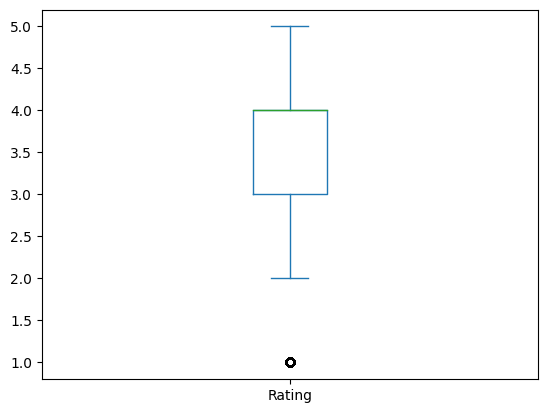

In [13]:
print('Median rating in ratings dataframe is :',ratings_copy.Rating.median())
ratings_copy.Rating.plot.box()

In [14]:
users.head(2)

,UserID::Gender::Age::Occupation::Zip-code
0,1::F::1::10::48067
1,2::M::56::16::70072


In [15]:
users = users['UserID::Gender::Age::Occupation::Zip-code'].str.split('::',expand=True)
users.columns = ['UserID','Gender','Age','Occupation','Zip-code']

In [16]:
users.sample(2)

,UserID,Gender,Age,Occupation,Zip-code
5567,5568,M,18,4,49841
4493,4494,M,45,0,33460


In [17]:
# No null values in users column
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   object
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   object
 3   Occupation  6040 non-null   object
 4   Zip-code    6040 non-null   object
dtypes: object(5)
memory usage: 236.1+ KB


## User column profiling:

####    UserIDs range between 1 and 6040

####    MovieIDs range between 1 and 3952

####    Ratings are made on a 5-star scale (whole-star ratings only)

####    Timestamp is represented in seconds

####    Each user has at least 20 ratings


In [18]:
user_rating_df = pd.merge(ratings, users, how='inner', on='UserID')
user_rating_df.head(2)

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067


In [19]:
age_rating_counts = user_rating_df['Age'].value_counts()

### Users in the age group 25-34 watched and rated the most number of movies:

<AxesSubplot: xlabel='Age'>

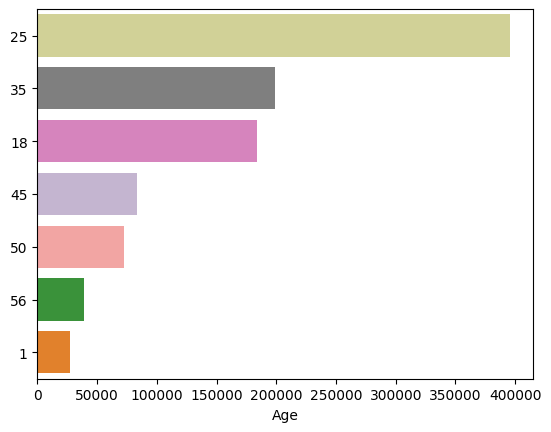

In [20]:
sns.barplot(x=age_rating_counts, y=age_rating_counts.index, palette="tab20_r")

In [21]:
occupation_rating_counts = user_rating_df['Occupation'].value_counts()

### "college/grad student" has  watched and rated the most number of movies:

<AxesSubplot: xlabel='Occupation'>

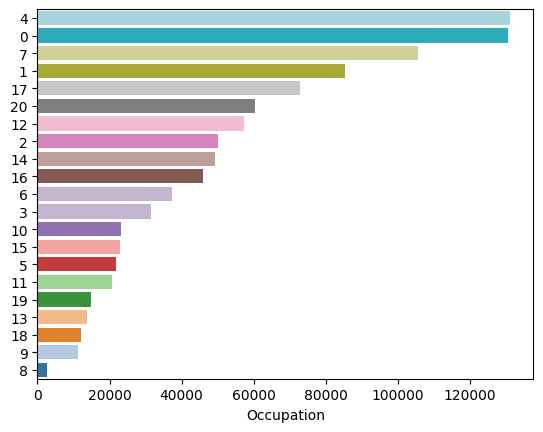

In [22]:
sns.barplot(x=occupation_rating_counts, y=occupation_rating_counts.index, palette="tab20_r")

### Most of the users in our dataset who’ve rated the movies are Male

<AxesSubplot: >

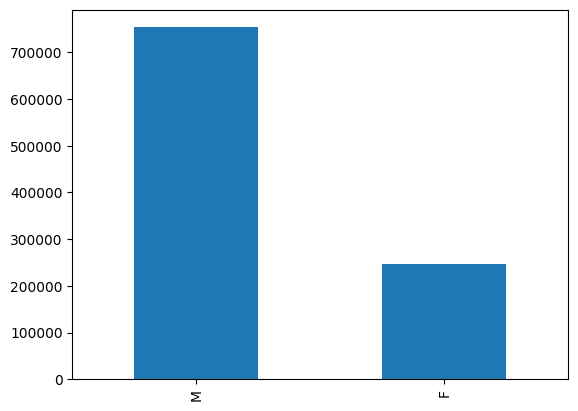

In [23]:
user_rating_df.Gender.value_counts().plot(kind='bar')

In [24]:
def clean_year(x):
    try:
        return x.replace(')','')
    except AttributeError:
        return None
    
def str_to_int(x):
    try:
        return int(x)
    except ValueError:
        return None

In [25]:
movies_copy = movies.copy()
movies_copy[['movie','year','drop1','drop2']] = movies_copy['Title'].str.split('(',expand=True)
movies_copy['year'] = movies_copy['year'].apply(clean_year).dropna()
movies_copy['year'] = movies_copy['year'].apply(str_to_int).dropna()
movies_copy = movies_copy.drop(['drop1','drop2'],axis=1)
movies_copy = movies_copy[~movies_copy.year.isna()]
#movies_copy = movies_copy.astype({"year": int})
bins = [1930, 1940, 1950, 1960, 1970, 1980, 1990,2000]
movies_copy['year_binned'] = pd.cut(movies_copy['year'], bins)
movies_copy.head(2)

,MovieID,Title,Genres,movie,year,year_binned
0,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story,1995.0,"(1990, 2000]"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,1995.0,"(1990, 2000]"


### Most of the movies present in our dataset were released in 90s :

<AxesSubplot: >

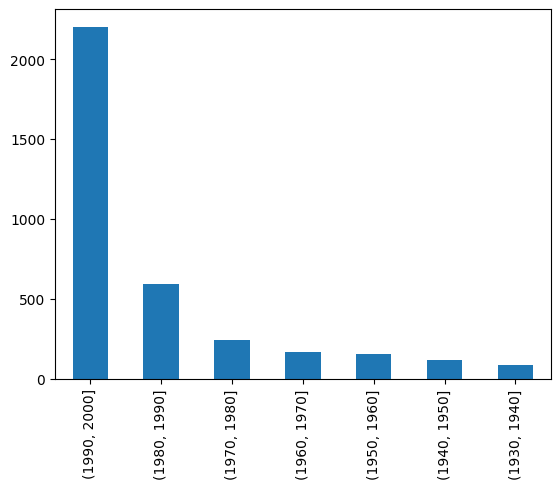

In [26]:
movies_copy.year_binned.value_counts().plot(kind='bar')

In [27]:
df_1 = pd.merge(movies, ratings, how='inner', on='MovieID')
df_1.head(2)

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008


In [28]:
df_2 = pd.merge(df_1, users, how='inner', on='UserID')
df_2.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantas,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [29]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  object
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  object
 4   Rating      1000209 non-null  object
 5   Timestamp   1000209 non-null  object
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  object
 8   Occupation  1000209 non-null  object
 9   Zip-code    1000209 non-null  object
dtypes: object(10)
memory usage: 83.9+ MB


In [30]:
# Changing data types of integer valued columns:
df_2 = df_2.astype({"MovieID": int, "UserID": int,
                    "Rating": int, "Age": int,
                    "Occupation": int})

## Correlation

C:\Users\1267\AppData\Local\Temp\ipykernel_18052\4260970755.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df_2.corr(), cmap="YlGnBu", annot=True)


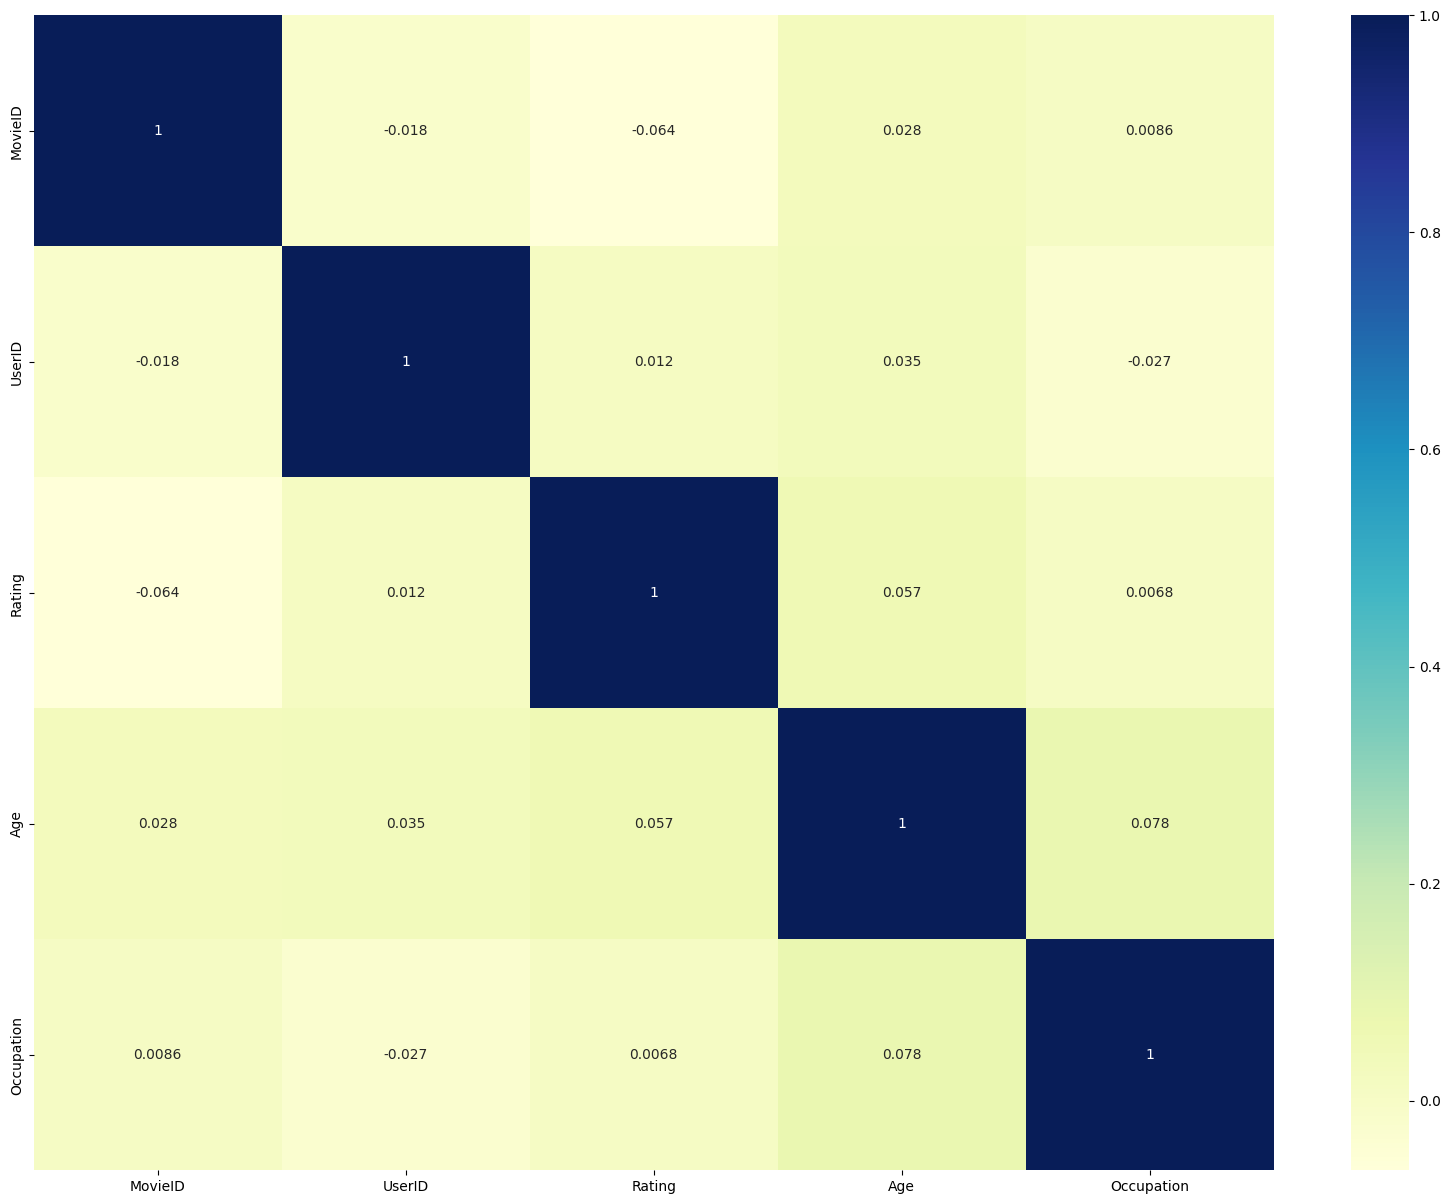

In [31]:
plt.subplots(figsize=(20,15))
dataplot = sns.heatmap(df_2.corr(), cmap="YlGnBu", annot=True)

**Occupation and Age columns have highest positive correlation followed by Occupation and Rating column**

### Average Rating for each movie:

In [32]:
agg_df_2 = df_2.groupby('Title').aggregate({'Rating':'mean','MovieID':'count'})
agg_df_2.reset_index(inplace=True)

In [33]:
agg_df_2.columns=['Title','Avg Rating','Total Ratings']
agg_df_2 = agg_df_2.sort_values(by=['Avg Rating','Total Ratings'], ascending=[False,False])
agg_df_2.head(5)

,Title,Avg Rating,Total Ratings
1297,"Gate of Heavenly Peace, The (1995)",5.0,3
3044,Smashing Time (1967),5.0,2
249,"Baby, The (1973)",5.0,1
407,Bittersweet Motel (2000),5.0,1
1203,Follow the Bitch (1998),5.0,1


### Top 5 Most viewed  movies:

In [34]:
agg_df_2.sort_values(by=['Total Ratings'], ascending=[False])[:5]

,Title,Avg Rating,Total Ratings
127,American Beauty (1999),4.317386,3428
3153,Star Wars: Episode IV - A New Hope (1977),4.453694,2991
3154,Star Wars: Episode V - The Empire Strikes Back...,4.292977,2990
3155,Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
1789,Jurassic Park (1993),3.763847,2672


In [35]:
data = df_2[['UserID','MovieID','Rating']] #Considering only the userid, itemid and ratings
data.head()

,UserID,MovieID,Rating
0,1,1,5
1,1,48,5
2,1,150,5
3,1,260,4
4,1,527,5


In [36]:
data.isna().sum() 

UserID     0
MovieID    0
Rating     0
dtype: int64

### Percentage of 5-star,4-star,3-star,2-star and 1-star in final dataframe:

In [37]:
data['Rating'].value_counts()/len(data) * 100

4    34.889808
3    26.114242
5    22.626271
2    10.753453
1     5.616226
Name: Rating, dtype: float64

# Recommendation using surprise package:

In [38]:
from surprise import KNNWithMeans 
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader

In [39]:
df = data.copy()

In [40]:
df.head()

,UserID,MovieID,Rating
0,1,1,5
1,1,48,5
2,1,150,5
3,1,260,4
4,1,527,5


In [72]:
data.columns

Index(['UserID', 'MovieID', 'Rating'], dtype='object')

In [73]:
## The Reader class is used to parse a file containing ratings.
## It orders the data in format of (userid,title,rating) and even by considering the rating scale
reader = Reader(rating_scale=(0.5 , 5))
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(data[['UserID', 'MovieID', 'Rating']], reader) # loading the data as per the format

In [74]:
anti_set = data.build_full_trainset().build_anti_testset()

In [75]:
trainset, testset = train_test_split(data, test_size=.15) # Splitting the data

## Item - based collaborative filtering

### a) based on Pearson Correlation

In [93]:
algo_i = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_i.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [94]:
# run the trained model against the testset
test_pred = algo_i.test(testset)

In [95]:
# get RMSE on test set
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 0.8592


0.8592284669619842

In [96]:
def get_top_recommendations(movie_id):
    movie_id = int(movie_id)
    tsr_inner_id = algo_i.trainset.to_inner_iid(movie_id) 
    #Getting the 5 nearest neighbors for movieId
    tsr_neighbors = algo_i.get_neighbors(tsr_inner_id, k=5)
    raw_ids = [str(algo_i.trainset.to_raw_iid(inner_id)) for inner_id in tsr_neighbors]
    #Displaying the 5 nearest neighbors to the movie.
    return movies[movies.MovieID.isin(raw_ids)]

In [97]:
dataFrameOut = movies[movies['Title'].str.contains('Liar')]
dataFrameOut

,MovieID,Title,Genres
1455,1485,Liar Liar (1997),Comedy
2813,2882,Jakob the Liar (1999),Drama


## Get top recommendations for 'Liar Liar':

In [98]:
get_top_recommendations(1485)

,MovieID,Title,Genres
18,19,Ace Ventura: When Nature Calls (1995),Comedy
228,231,Dumb & Dumber (1994),Comedy
340,344,Ace Ventura: Pet Detective (1994),Comedy
363,367,"Mask, The (1994)",Comedy|Crime|Fantasy
1932,2001,Lethal Weapon 2 (1989),Action|Comedy|Crime|Drama


### b) based on Cosine Similarity

In [51]:
algo_j = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})
algo_j.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [52]:
# run the trained model against the testset
test_pred = algo_j.test(testset)

In [53]:
# get RMSE on test set
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 0.8895


0.8895066319870393

In [54]:
def get_top_recommendations1(movie_id):
    movie_id = int(movie_id)
    tsr_inner_id = algo_j.trainset.to_inner_iid(movie_id) 
    #Getting the 5 nearest neighbors for movieId
    tsr_neighbors = algo_j.get_neighbors(tsr_inner_id, k=5)
    raw_ids = [str(algo_j.trainset.to_raw_iid(inner_id)) for inner_id in tsr_neighbors]
    #Displaying the 5 nearest neighbors to the movie.
    return movies[movies.MovieID.isin(raw_ids)]

In [55]:
# get top recommendations for 'Liar Liar':
get_top_recommendations1(1485)

,MovieID,Title,Genres
1613,1659,Hurricane Streets (1998),Drama
2424,2493,"Harmonists, The (1997)",Drama
2636,2705,"Late August, Early September (Fin août, début ...",
3453,3522,Sacco and Vanzetti (Sacco e Vanzetti) (1971),Drama
3498,3567,Bossa Nova (1999),Comedy


## Item-Based Collaborative Filtering from scratch:

In [72]:
p_table = pd.pivot_table(df_2, index= ['MovieID'], columns = ['UserID'], values=['Rating'])
p_table = p_table.fillna(0)

In [73]:
p_table.head(3)

Rating                                               ...            \
UserID    1    2    3    4    5    6    7    8    9    10    ... 6031 6032   
MovieID                                                      ...             
1          5.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  5.0  5.0  ...  0.0  4.0   
2          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  ...  0.0  0.0   
3          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

                                                 
UserID  6033 6034 6035 6036 6037 6038 6039 6040  
MovieID                                          
1        0.0  0.0  4.0  0.0  0.0  0.0  0.0  3.0  
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3        0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 6040 columns]

In [74]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(p_table.values)
distances, indices = knn.kneighbors(p_table.values, n_neighbors=3)

In [81]:
# get the index for 'movie 19'
index_for_movie = p_table.index.tolist().index(19)# find the indices for the similar movies
sim_movies = indices[index_for_movie].tolist()# distances between 'movie_0' and the similar movies
movie_distances = distances[index_for_movie].tolist()# the position of 'movie_0' in the list sim_movies
id_movie = sim_movies.index(index_for_movie)# remove 'movie_0' from the list sim_movies
sim_movies.remove(index_for_movie)# remove 'movie_0' from the list movie_distances
movie_distances.pop(id_movie)
print('The Nearest Movies to 19:', sim_movies)
print('The Distance from 19:', movie_distances)

The Nearest Movies to 19: [334, 224]
The Distance from 19: [0.4033162461143531, 0.560394575421953]


In [82]:
movies[movies.MovieID.isin([str(i) for i in sim_movies])]

,MovieID,Title,Genres
221,224,Don Juan DeMarco (1995),Comedy|Drama|Romance
330,334,Vanya on 42nd Street (1994),Drama


## User - based collaborative filtering

In [96]:
algo = KNNWithMeans(k = 25, sim_options={'name': 'pearson_baseline', 'user_based': True}) 

algo.fit(trainset) #fitting the train dataset

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [97]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [98]:
# get RMSE on test set
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 0.8883


0.8883319281323834

In [99]:
#anti_pre = algo.test(anti_set)

In [100]:
pd.DataFrame(test_pred).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150032 entries, 0 to 150031
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   uid      150032 non-null  int64  
 1   iid      150032 non-null  int64  
 2   r_ui     150032 non-null  float64
 3   est      150032 non-null  float64
 4   details  150032 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 5.7+ MB


In [101]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   object
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


In [102]:
movies = movies.astype({"MovieID": int})

In [103]:
pred_df = pd.DataFrame(test_pred).merge(movies , left_on = ['iid'], right_on = ['MovieID'])

In [104]:
users = users.astype({"UserID": int})

In [105]:
pred_df = pd.DataFrame(test_pred).merge(users , left_on = ['uid'], right_on = ['UserID'])

In [106]:
pred_df.head(3)

,uid,iid,r_ui,est,details,UserID,Gender,Age,Occupation,Zip-code
0,3513,3105,4.0,3.611484,"{'actual_k': 25, 'was_impossible': False}",3513,M,25,16,01890
1,3513,2302,4.0,3.855545,"{'actual_k': 25, 'was_impossible': False}",3513,M,25,16,01890
2,3513,1257,5.0,3.604676,"{'actual_k': 25, 'was_impossible': False}",3513,M,25,16,01890


In [107]:
def get_top_recommendations2(user_id):
    res = pred_df[(pred_df['est'] > 3) &(pred_df['UserID']== user_id)]
    res = res.sort_values(by=['est'],ascending =False)
    m_ids = list(res['iid'])[:5]
    return movies[movies['MovieID'].isin(m_ids)]['Title']

In [108]:
user_id = 1
print('Top movie recommendation for user_id = {} is'.format(user_id) ) 
print()
get_top_recommendations2(user_id)

Top movie recommendation for user_id = 1 is



590     Snow White and the Seven Dwarfs (1937)
2329             Miracle on 34th Street (1947)
2693                   Sixth Sense, The (1999)
3339                    Erin Brockovich (2000)
Name: Title, dtype: object

## Matrix Factorization

In [69]:
from surprise import SVD
from surprise.model_selection import cross_validate

In [76]:
svd = SVD() 
cross_validate(svd, data, measures=['rmse','mae'], cv = 5 , return_train_measures=True,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8740  0.8721  0.8735  0.8717  0.8753  0.8733  0.0013  
MAE (testset)     0.6854  0.6854  0.6860  0.6849  0.6867  0.6857  0.0006  
RMSE (trainset)   0.6704  0.6707  0.6700  0.6688  0.6694  0.6698  0.0007  
MAE (trainset)    0.5303  0.5307  0.5303  0.5289  0.5298  0.5300  0.0006  
Fit time          27.12   26.49   26.99   27.11   26.27   26.80   0.35    
Test time         5.20    3.05    3.16    2.93    5.37    3.94    1.10    


{'test_rmse': array([0.8740391 , 0.8721064 , 0.87354156, 0.87174843, 0.87528244]),
 'train_rmse': array([0.67035038, 0.67066578, 0.66997401, 0.66879877, 0.6694324 ]),
 'test_mae': array([0.68536975, 0.68537777, 0.68599631, 0.6849286 , 0.68669657]),
 'train_mae': array([0.53026343, 0.53069931, 0.53029189, 0.52894958, 0.52983418]),
 'fit_time': (27.118249893188477,
  26.491344451904297,
  26.98891592025757,
  27.105039834976196,
  26.27310800552368),
 'test_time': (5.201880931854248,
  3.0547022819519043,
  3.161517381668091,
  2.9305169582366943,
  5.371751546859741)}

In [103]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [104]:
svd.pu.shape , svd.qi.shape

((6040, 100), (3706, 100))

In [105]:
# Embeddings of Users:
svd.pu

array([[ 0.14025476,  0.0606829 , -0.16162088, ...,  0.00217234,
        -0.20457006,  0.08624623],
       [ 0.07646   ,  0.026589  ,  0.1060912 , ...,  0.20048608,
         0.04465206,  0.02496292],
       [ 0.14094364, -0.09221746,  0.09894712, ..., -0.12439506,
        -0.06201178, -0.20368921],
       ...,
       [-0.08548903, -0.14938611,  0.00655201, ..., -0.18625769,
        -0.03493881,  0.05930612],
       [-0.10286616,  0.04045205,  0.00252325, ..., -0.06629147,
         0.22140148, -0.03369383],
       [-0.01457187, -0.14687743,  0.10122025, ...,  0.02055318,
         0.07396195,  0.06992786]])

In [106]:
# Embeddings of Movies:
svd.qi

array([[ 0.18080737,  0.20402452, -0.17398416, ...,  0.30120005,
        -0.04873666, -0.05619824],
       [ 0.20563234,  0.07350702,  0.04250742, ...,  0.26176323,
        -0.22022928, -0.01046673],
       [ 0.165725  , -0.08218531,  0.07920492, ...,  0.20039072,
         0.04332551,  0.15170556],
       ...,
       [ 0.03076271,  0.03105086,  0.01706483, ...,  0.0458508 ,
         0.09971547, -0.01764991],
       [ 0.0094158 , -0.22175168, -0.09814283, ..., -0.0314116 ,
        -0.06677032, -0.07776497],
       [-0.0142065 ,  0.15233755,  0.16240269, ..., -0.09609891,
         0.1686861 , -0.0323188 ]])

In [107]:
def get_top_recommendations3(user_id):
    items = movies['Title'].unique()
    test = [[user_id, iid, 4] for iid in items]
    ##Finding the user predictions(ratings) for all the movies
    predictions = svd.test(test)
    pred = pd.DataFrame(predictions)
    return pred['iid'][:5]

In [108]:
# Recommendation for user : 662
get_top_recommendations3(662)

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: iid, dtype: object

In [109]:
testset = trainset.build_anti_testset()
predictions_svd = svd.test(testset) 

In [110]:
print('SVD - RMSE:', accuracy.rmse(predictions_svd, verbose=False))
print('SVD - MAE:', accuracy.mae(predictions_svd, verbose=False))

SVD - RMSE: 0.7003625562585563
SVD - MAE: 0.5422393673492503


## Matrix Factorization with d=4 using cmfrec:

In [41]:
from cmfrec import CMF

In [42]:
rm_raw = df.copy()
rm_raw.head(2)

,UserID,MovieID,Rating
0,1,1,5
1,1,48,5


In [43]:
rm_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype
---  ------   --------------    -----
 0   UserID   1000209 non-null  int32
 1   MovieID  1000209 non-null  int32
 2   Rating   1000209 non-null  int32
dtypes: int32(3)
memory usage: 19.1 MB


In [44]:
rm_raw.columns = ['UserId','ItemId','Rating'].copy()

In [45]:
model = CMF(k=4)
model.fit(rm_raw)

Starting ALS optimization routine

Updating B ... done
Updating A ... done
	Completed ALS iteration  1

Updating B ... done
Updating A ... done
	Completed ALS iteration  2

Updating B ... done
Updating A ... done
	Completed ALS iteration  3

Updating B ... done
Updating A ... done
	Completed ALS iteration  4

Updating B ... done
Updating A ... done
	Completed ALS iteration  5

Updating B ... done
Updating A ... done
	Completed ALS iteration  6

Updating B ... done
Updating A ... done
	Completed ALS iteration  7

Updating B ... done
Updating A ... done
	Completed ALS iteration  8

Updating B ... done
Updating A ... done
	Completed ALS iteration  9

Updating B ... done
Updating A ... done
	Completed ALS iteration 10

ALS procedure terminated successfully


Collective matrix factorization model
(explicit-feedback variant)


In [46]:
# User Embedding
model.A_

array([[ 0.08404603, -0.34657595,  0.10241609,  0.19535628],
       [-0.00651146, -0.5926335 ,  0.18200096, -0.50435007],
       [ 0.08053058,  0.1901446 , -0.23939514,  0.32482678],
       ...,
       [ 0.00724335,  0.2813027 ,  0.23453984,  0.2679208 ],
       [-0.18595792, -0.03760365, -0.14798997, -0.2837879 ],
       [ 0.4272892 , -0.02914813,  0.09117861, -0.1552803 ]],
      dtype=float32)

In [47]:
model.A_.shape

(6040, 4)

In [48]:
# Movie Embedding
model.B_

array([[ 1.4269935e+00,  2.5320774e-01,  2.6381704e-01, -1.2016895e-02],
       [ 2.4189557e-01, -8.2531959e-01,  3.4426540e-01, -2.2754049e-01],
       [ 1.0049114e+00, -4.1237411e-01,  1.1511104e-01,  4.4478700e-02],
       ...,
       [ 8.0024851e-03,  5.3440983e-04, -6.9885696e-03, -4.3837088e-03],
       [-7.6927864e-03,  3.1846229e-03,  1.1772081e-03,  1.1570229e-02],
       [ 6.3526444e-05, -6.2009194e-03, -1.0589255e-03, -1.9701037e-03]],
      dtype=float32)

In [49]:
model.B_.shape

(3706, 4)

In [50]:
# GLobal mean
model.glob_mean_

3.581564426422119

In [51]:
top_items = model.topN(user=34,n=10)

### Predict top 5 items for a given user(d=4):

In [79]:
top_items = model.topN(user=662,n=5)
top_items

array([  50, 2959, 1136, 2858,  296])

In [80]:
movies[movies['MovieID'].isin([str(i) for i in top_items])]

,MovieID,Title,Genres
49,50,"Usual Suspects, The (1995)",Crime|Thriller
293,296,Pulp Fiction (1994),Crime|Drama
1120,1136,Monty Python and the Holy Grail (1974),Comedy
2789,2858,American Beauty (1999),Comedy|Drama
2890,2959,Fight Club (1999),Drama


In [64]:
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [77]:
pred_ = model.predict(rm_raw.UserId, rm_raw.ItemId)
print("RMSE of CMF model with d=4: %.3f [rho: %.3f]" %
      (np.sqrt(mean_squared_error(rm_raw.Rating,
                                  pred_,
                                  squared=True)),
       np.corrcoef(rm_raw.Rating, pred_)[0,1]))
print("MSE of CMF model with d=4: %.3f" %
      (mean_absolute_percentage_error(rm_raw.Rating,
                                  pred_)))

RMSE of CMF model with d=4: 0.826 [rho: 0.674]
MSE of CMF model with d=4: 0.251


# Questionnaire:

### 1. Users of which age group have watched and rated the most number of movies?
### Ans: Users in the age group 25-34

### 2. Users belonging to which profession have watched and rated the most movies?
### Ans: "college/grad student" profession

### 3. Most of the users in our dataset who’ve rated the movies are Male.
### Ans: True

### 4. Most of the movies present in our dataset were released in which decade?
### Ans: 90s

### 5.The movie with maximum no. of ratings is
### Ans: American Beauty (1999)

### 6. Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach:

In [100]:
get_top_recommendations(1485)[:3]

,MovieID,Title,Genres
18,19,Ace Ventura: When Nature Calls (1995),Comedy
228,231,Dumb & Dumber (1994),Comedy
340,344,Ace Ventura: Pet Detective (1994),Comedy


### 7.On the basis of approach, Collaborative Filtering methods can be classified into:
### Ans: Item-based and User-based.

### 8. Pearson Correlation ranges between  − 1 and 1 whereas, 
### Cosine Similarity belongs to the interval between 0 to 1.

### 9. Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.

In [111]:
print('SVD - RMSE:', accuracy.rmse(predictions_svd, verbose=False))
print('SVD - MAE:', accuracy.mae(predictions_svd, verbose=False))

SVD - RMSE: 0.7003625562585563
SVD - MAE: 0.5422393673492503


### 10. Give the sparse ‘row’ matrix representation for the following dense matrix -

In [104]:
import scipy
from numpy import array

In [105]:
dense = array([[1, 0],[3,7]])

In [106]:
csr = scipy.sparse.csr_matrix(dense)

In [107]:
# Sparse 'row' matrix:
print(csr)

  (0, 0)	1
  (1, 0)	3
  (1, 1)	7


In [109]:
csr.todense()

matrix([[1, 0],
        [3, 7]], dtype=int32)